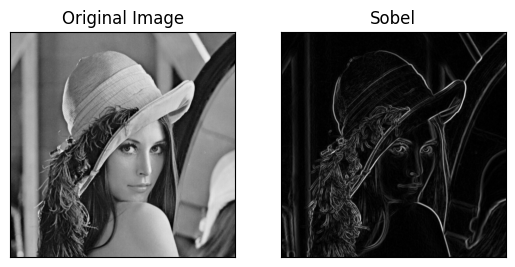

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Load the image in gray
gray_image = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)

#process horizontal sobel 
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)

#process vertical sobel
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

#combine horizontal and vertical sobel
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Display gray and sobel processed images
plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

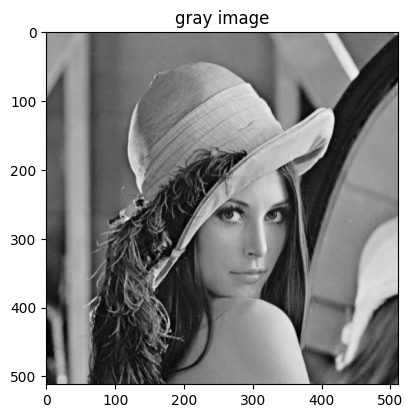

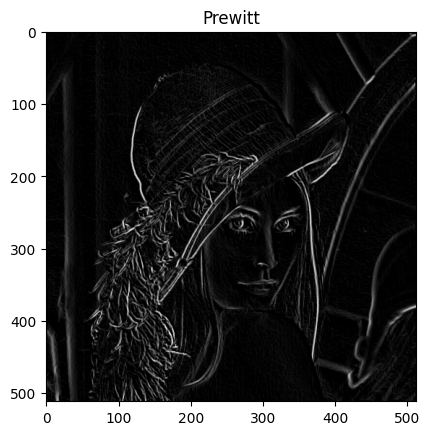

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load the image in gray
image = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)

#configure prewitt mask
prewitt_x = np.array([[ -1, 0, 1],
                      [ -1, 0, 1],
                      [ -1, 0, 1]])

prewitt_y = np.array([[ 1,  1,  1],
                      [ 0,  0,  0],
                      [-1, -1, -1]])

#horizontal prewitt
edges_x = cv2.filter2D(image, -1, prewitt_x)

#vertical prewitt
edges_y = cv2.filter2D(image, -1, prewitt_y)

#horizontal+vertical prewitt
edges = cv2.magnitude(edges_x.astype(float), edges_y.astype(float))

#normalize the image
edges = np.uint8(edges * 255.0 / np.max(edges))

# Display gray and prewitt processed images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('gray image')
plt.imshow(image, cmap='gray')

plt.figure()
plt.title('Prewitt')
plt.imshow(edges, cmap='gray')

plt.show()

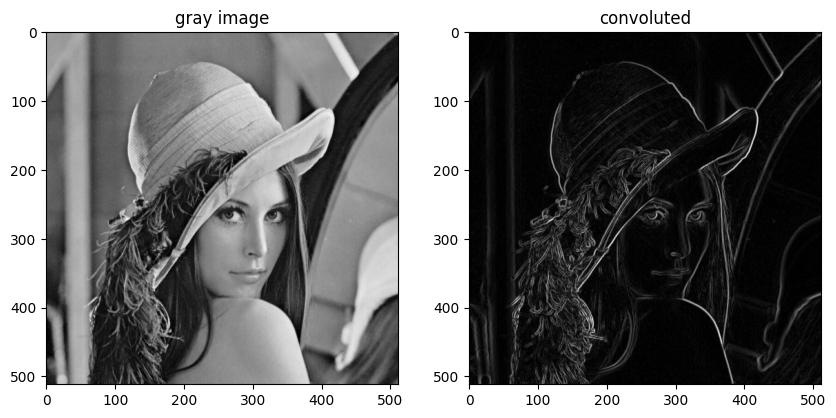

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in gray
l_image = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
image = np.array(l_image, dtype=np.float32)

#horizontal mask
x_mask = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])  
#vertical mask
y_mask = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]]) 

#define convolution function
def convolve(image, kernel):
    return cv2.filter2D(image, -1, kernel)

#convolve horizontal & vertical masked image
x_cnv_image = convolve(image, x_mask)
y_cnv_image = convolve(image, y_mask)

#combine convoluted images
sq_image = np.sqrt(x_cnv_image**2 + y_cnv_image**2)
sq_image1 = (sq_image / np.max(sq_image)) * 255
cnv_image = sq_image1.astype(np.uint8)

#display gray and convoluted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("gray image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("convoluted")
plt.imshow(cnv_image, cmap='gray')

plt.show()